<a href="https://colab.research.google.com/github/thomasvengal/deeplearning/blob/master/Lab_Sheet_2-DNN-Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network using Keras

Import Libraries
- Tensorflow
- Keras
- numpy and random

In [0]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"



In [0]:
import tensorflow_datasets as tfds
#tfds.list_builders()
# Construct a tf.data.Dataset
#data_dir=gs://tfds-data/datasets
#data, info = tfds.load("mnist", with_info=True)

dataset = tfds.load(name="mnist", split="train")


In [0]:
# Build your input pipeline
#dataset = dataset.shuffle(1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
for features in dataset.take(1):
  image, label = features["image"], features["label"]

In [0]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

## DNN Model

Using Keras, create the DNN or Sequential Model

In [0]:
# Create a model object

dnnModel = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [0]:
# Layer 1 = input layer
# specify the input size for in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))

# Add dropout of 25% to layer 2
#dnnModel.add(layers.Dropout(0.25))

# Layer 3 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


## Dataset

In [0]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

In [0]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Ytrain :  5


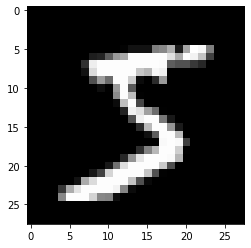

In [0]:
# print a sample data
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(Xtrain[0], cmap='gray')
print('Ytrain : ', Ytrain[0])

In [0]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

Ytrain:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


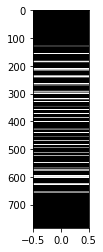

In [0]:
# print an input data

plt.imshow(Xtrain[1].reshape(28*28,1), cmap='gist_gray',aspect=0.005)
print('Ytrain: ', Ytrain[0])

## Optimizations of DNN

In [0]:
# Configure  the model for training, by using appropriate optimizers 
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile(optimizer = 'rmsprop', #adam #rmsprop
                 loss = 'categorical_crossentropy', 
                 metrics=['accuracy'] )

## Train the Model

In [0]:
# train the model

history = dnnModel.fit(Xtrain, Ytrain, epochs=10, batch_size=64)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3605 - accuracy: 0.8984
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1744 - accuracy: 0.9499
Epoch 3/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1323 - accuracy: 0.9614
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1092 - accuracy: 0.9678
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0931 - accuracy: 0.9726
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0827 - accuracy: 0.9755s - loss: 0.0829 - 
Epoch 7/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0738 - accuracy: 0.9779
Epoch 8/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0658 - accuracy: 0.9805
Epoch 9/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0612 - accuracy: 0.

## Results and Outputs

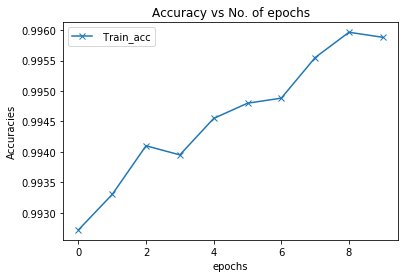

In [0]:
# training accuracy
plt.plot(history.history['accuracy'], '-x', label=' Train_acc')
plt.xlabel('epochs')
plt.ylabel('Accuracies')
plt.title('Accuracy vs No. of epochs')
plt.legend()
plt.show()

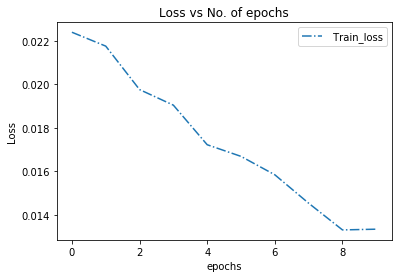

In [0]:
#training loss
plt.plot(history.history['loss'], '-.', label=' Train_loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Loss vs No. of epochs')
plt.legend()
plt.show()

## Testing the Model

In [0]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy * 100, '%')

Testing loss 	 0.17333596860614026
Testing accuracy  97.04999923706055 %


# Exercise 

Modify the code to get a better testing accuracy.
- Increase number of nodes to 64 and 32 units/nodes
- Add a dropout layer of ratio 0.25
- Use a optimizer rmsprop